<a href="https://colab.research.google.com/github/Kaia-nyoung/2025-ML-class/blob/main/8%EC%A3%BC%EC%B0%A8/tsla_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [2]:
stock_AJ = pd.read_csv("/content/drive/MyDrive/ML-MK/TSLA.csv")
stock_AJ = stock_AJ[['Open','High','Low','Volume','Close']].dropna().reset_index(drop=True)

In [3]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(stock_AJ.values)  # (N, 5)
scaled_df = pd.DataFrame(scaled, columns=['Open','High','Low','Volume','Close'])

In [4]:
window_size = 10
data_X, data_y = [], []

for i in range(len(scaled_df) - window_size):
    data_X.append(scaled_df.iloc[i:i+window_size, [0,1,2,3]].values)  # Open~Volume
    data_y.append(scaled_df.iloc[i+window_size, 4])                   # Close

data_X, data_y = np.array(data_X), np.array(data_y)


In [5]:
train_size = int(len(data_y) * 0.7)
train_X, test_X = data_X[:train_size], data_X[train_size:]
train_y, test_y = data_y[:train_size], data_y[train_size:]

print("train:", train_X.shape, train_y.shape)
print("test :", test_X.shape, test_y.shape)

train: (2062, 10, 4) (2062,)
test : (884, 10, 4) (884,)


In [6]:
model = Sequential()
model.add(LSTM(20, activation='relu', return_sequences=True, input_shape=(window_size, 4)))
model.add(Dropout(0.1))
model.add(LSTM(20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 20)         │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 20)             │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,301 (20.71 KB)

 Trainable params: 5,301 (20.71 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.fit(train_X, train_y, epochs=70, batch_size=30, validation_data=(test_X, test_y), shuffle=False, verbose=1)

Epoch 1/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - loss: 2.2472e-05 - val_loss: 0.1079
Epoch 2/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 6.0831e-04 - val_loss: 0.1315
Epoch 3/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.7917e-04 - val_loss: 0.1234
Epoch 4/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.3980e-04 - val_loss: 0.1242
Epoch 5/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.3538e-04 - val_loss: 0.0655
Epoch 6/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.2125e-04 - val_loss: 0.0313
Epoch 7/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6960e-04 - val_loss: 0.0145
Epoch 8/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9571e-04 - val_loss: 0.0435
Epoch 9/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1348e-04 - val_loss: 0.0317
Epoch 10/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8733e-04 - val_loss: 0.0095
Epoch 11/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.7191e-05 - val_loss: 0.0218
Epoch 12/70
69/69 ━━━━━━━━━━

In [8]:
pred_y = model.predict(test_X)

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step


In [9]:
feat_dim = 5
close_idx = 4  # Close 열 인덱스

# (1) 예측값 역변환
z = np.zeros((len(pred_y), feat_dim))
z[:, close_idx] = pred_y[:, 0]
pred_y_inv = scaler.inverse_transform(z)[:, close_idx]

# (2) 실제값 역변환
z = np.zeros((len(test_y), feat_dim))
z[:, close_idx] = test_y
y_test_inv = scaler.inverse_transform(z)[:, close_idx]

In [10]:
mse_scaled = tf.reduce_mean(tf.square(test_y - pred_y)).numpy()
mse_original = tf.reduce_mean(tf.square(y_test_inv - pred_y_inv)).numpy()

print(f"MSE (Scaled 0~1): {mse_scaled:.6f}")
print(f"MSE (Original Scale): {mse_original:.2f}")

MSE (Scaled 0~1): 0.150697
MSE (Original Scale): 240826.67


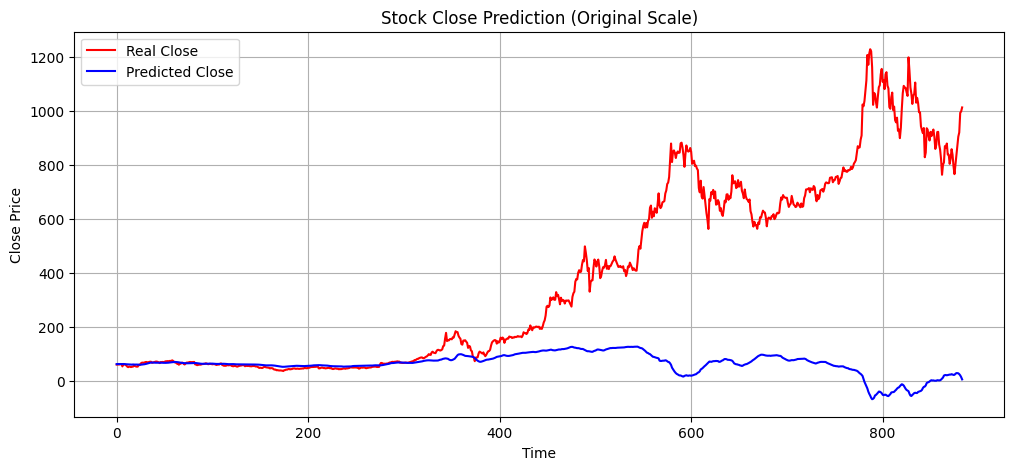

In [11]:
plt.figure(figsize=(12,5))
plt.plot(y_test_inv, color='red', label='Real Close')
plt.plot(pred_y_inv, color='blue', label='Predicted Close')
plt.title('Stock Close Prediction (Original Scale)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()